# The Facebook Campaign: Revealing Politcians’ Hidden Ads
Kevin Fosnacht 10/19/22

NLP Final - Part 2

## Preprocessing
### Import Dependencies

In [1]:
import os, zipfile
import pandas as pd
import glob
import numpy as np

### Extract all csvs from zip files

In [2]:
path="C:/Users/kookie/OneDrive - Indiana University/classes/NLP/Final"
dir_name = path+'/Democrat'
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        #os.remove(file_name) # delete zipped file
        
dir_name = path+'/Republican'
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        #os.remove(file_name) # delete zipped file

### Get list of files & append

In [3]:
#join all csvs in the dem folder
party='Democrat'
#print(dir_name)
all_files = glob.glob(os.path.join(path,party, "*.csv"))
#print(all_files)
dem = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
dem['party']="D"
dem

#join all csvs in the rep folder
party='Republican'
#print(dir_name)
all_files = glob.glob(os.path.join(path,party, "*.csv"))
#print(all_files)
rep = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
rep['party']="R"
rep

#combine

df=dem.append(rep, ignore_index=True)
df.party.value_counts()

D    100586
R     19380
Name: party, dtype: int64

### Limit data to 2022, combine text columns, remove nulls

In [5]:
df=df[(df['ad_creation_time']>='2022-01-01') | (df['ad_delivery_stop_time']>='2022-01-01')]
df[['ad_creative_bodies','ad_creative_link_titles','ad_creative_link_descriptions']] = df[['ad_creative_bodies','ad_creative_link_titles','ad_creative_link_descriptions']].fillna('')
df['text']=df['ad_creative_bodies']+' '+df['ad_creative_link_titles']+' '+df['ad_creative_link_descriptions']
df['text']=df['text'].str.strip()
df=df[df['text']!='']
df['page_name']=np.where(df['page_name']=="McDermott for Indiana","Thomas McDermott Jr.",df['page_name']) #fixing a case where a candidate used multiple page_names
df

,ad_archive_id,page_id,page_name,ad_creation_time,ad_delivery_start_time,ad_delivery_stop_time,byline,ad_creative_bodies,ad_creative_link_titles,ad_creative_link_captions,...,impressions,spend,currency,demographic_distribution,delivery_by_region,publisher_platforms,estimated_audience_size,languages,party,text
0,473922708011252,131182018871,Patty Murray,2022-10-06,2022-10-06,NaN,PEOPLE FOR PATTY MURRAY,https://www.usatoday.com/story/news/politics/2...,GOP Senate candidate Tiffany Smiley declines t...,usatoday.com,...,"lower_bound: 0, upper_bound: 999","lower_bound: 0, upper_bound: 99",USD,NaN,NaN,instagram,"lower_bound: 100001, upper_bound: 500000",en,D,https://www.usatoday.com/story/news/politics/2...
1,503011384703565,131182018871,Patty Murray,2022-10-06,2022-10-06,NaN,PEOPLE FOR PATTY MURRAY,I will ALWAYS defend a woman’s right to make h...,Politicians like Tiffany Smiley say abortion i...,thenewstribune.com,...,"lower_bound: 0, upper_bound: 999","lower_bound: 0, upper_bound: 99",USD,"{""age"":""35-44"",""gender"":""female"",""percentage"":...","{""region"":""Washington"",""percentage"":1}",instagram,"lower_bound: 100001, upper_bound: 500000",en,D,I will ALWAYS defend a woman’s right to make h...
2,800775017927348,131182018871,Patty Murray,2022-10-06,2022-10-06,NaN,PEOPLE FOR PATTY MURRAY,Efforts to undermine our fair and free electio...,GOP Washington Senate candidate scrubs website...,axios.com,...,"lower_bound: 4000, upper_bound: 4999","lower_bound: 0, upper_bound: 99",USD,"{""age"":""18-24"",""gender"":""unknown"",""percentage""...","{""region"":""Washington"",""percentage"":1}",instagram,"lower_bound: 100001, upper_bound: 500000",en,D,Efforts to undermine our fair and free electio...
3,5726923204025242,131182018871,Patty Murray,2022-10-04,2022-10-04,NaN,PEOPLE FOR PATTY MURRAY,https://www.usatoday.com/story/news/politics/2...,GOP Senate candidate Tiffany Smiley declines t...,usatoday.com,...,"lower_bound: 0, upper_bound: 999","lower_bound: 0, upper_bound: 99",USD,"{""age"":""18-24"",""gender"":""unknown"",""percentage""...","{""region"":""Alaska"",""percentage"":0.008197},{""re...",instagram,"lower_bound: 50001, upper_bound: 100000",en,D,https://www.usatoday.com/story/news/politics/2...
4,1523241238109743,131182018871,Patty Murray,2022-10-04,2022-10-04,2022-10-04,PEOPLE FOR PATTY MURRAY,I will ALWAYS defend a woman’s right to make h...,Politicians like Tiffany Smiley say abortion i...,thenewstribune.com,...,"lower_bound: 0, upper_bound: 999","lower_bound: 0, upper_bound: 99",USD,NaN,NaN,instagram,"lower_bound: 100001, upper_bound: 500000",en,D,I will ALWAYS defend a woman’s right to make h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119600,2798858063593505,150763151677363,Markwayne Mullin,2022-01-18,2022-01-18,2022-02-28,MULLIN FOR CONGRESS,We should be able to trust our Commander in Ch...,Let us know what YOU think!,action.mullinforcongress.com,...,"lower_bound: 30000, upper_bound: 34999","lower_bound: 500, upper_bound: 599",USD,"{""age"":""45-54"",""gender"":""unknown"",""percentage""...","{""region"":""Oklahoma"",""percentage"":1}","facebook,instagram","lower_bound: 100001, upper_bound: 500000",en,R,We should be able to trust our Commander in Ch...
119601,4666440803462750,150763151677363,Markwayne Mullin,2022-01-13,2022-01-13,2022-02-28,MULLIN FOR CONGRESS,In order to bring your top priorities to Washi...,Complete This Survey,action.mullinforcongress.com,...,"lower_bound: 10000, upper_bound: 14999","lower_bound: 0, upper_bound: 99",USD,"{""age"":""55-64"",""gender"":""unknown"",""percentage""...","{""region"":""Oklahoma"",""percentage"":1}","facebook,instagram","lower_bound: 100001, upper_bound: 500000",en,R,In order to bring your top priorities to Washi...
119602,341203044516264,150763151677363,Markwayne Mullin,2022-01-13,2022-01-13,2022-02-28,MULLIN FOR CONGRESS,If President Joe Biden had his way - he'd RAIS...,Say NO to Biden's Tax Hikes!,action.mullinforcongress.com,

In [6]:
#counts for 2022 only ads
df.party.value_counts()

D    33228
R     9768
Name: party, dtype: int64

### Normalize data

In [7]:
import nltk
import text_normalizer as tn

stopword_list = nltk.corpus.stopwords.words('english')
# just to keep negation if any in bi-grams
stopword_list.append('senate')

# normalize our corpus
norm_corpus = tn.normalize_corpus(corpus=df['text'], html_stripping=True, contraction_expansion=True, 
                                  accented_char_removal=True, text_lower_case=True, text_lemmatization=True, 
                                  text_stemming=False, special_char_removal=True, remove_digits=True,
                                  stopword_removal=True, stopwords=stopword_list)
df['normtext'] = norm_corpus
df


C:\Users\kookie\anaconda3\lib\site-packages\bs4\__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


,ad_archive_id,page_id,page_name,ad_creation_time,ad_delivery_start_time,ad_delivery_stop_time,byline,ad_creative_bodies,ad_creative_link_titles,ad_creative_link_captions,...,spend,currency,demographic_distribution,delivery_by_region,publisher_platforms,estimated_audience_size,languages,party,text,normtext
0,473922708011252,131182018871,Patty Murray,2022-10-06,2022-10-06,NaN,PEOPLE FOR PATTY MURRAY,https://www.usatoday.com/story/news/politics/2...,GOP Senate candidate Tiffany Smiley declines t...,usatoday.com,...,"lower_bound: 0, upper_bound: 99",USD,NaN,NaN,instagram,"lower_bound: 100001, upper_bound: 500000",en,D,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...
1,503011384703565,131182018871,Patty Murray,2022-10-06,2022-10-06,NaN,PEOPLE FOR PATTY MURRAY,I will ALWAYS defend a woman’s right to make h...,Politicians like Tiffany Smiley say abortion i...,thenewstribune.com,...,"lower_bound: 0, upper_bound: 99",USD,"{""age"":""35-44"",""gender"":""female"",""percentage"":...","{""region"":""Washington"",""percentage"":1}",instagram,"lower_bound: 100001, upper_bound: 500000",en,D,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...
2,800775017927348,131182018871,Patty Murray,2022-10-06,2022-10-06,NaN,PEOPLE FOR PATTY MURRAY,Efforts to undermine our fair and free electio...,GOP Washington Senate candidate scrubs website...,axios.com,...,"lower_bound: 0, upper_bound: 99",USD,"{""age"":""18-24"",""gender"":""unknown"",""percentage""...","{""region"":""Washington"",""percentage"":1}",instagram,"lower_bound: 100001, upper_bound: 500000",en,D,Efforts to undermine our fair and free electio...,effort undermine fair free election put democr...
3,5726923204025242,131182018871,Patty Murray,2022-10-04,2022-10-04,NaN,PEOPLE FOR PATTY MURRAY,https://www.usatoday.com/story/news/politics/2...,GOP Senate candidate Tiffany Smiley declines t...,usatoday.com,...,"lower_bound: 0, upper_bound: 99",USD,"{""age"":""18-24"",""gender"":""unknown"",""percentage""...","{""region"":""Alaska"",""percentage"":0.008197},{""re...",instagram,"lower_bound: 50001, upper_bound: 100000",en,D,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...
4,1523241238109743,131182018871,Patty Murray,2022-10-04,2022-10-04,2022-10-04,PEOPLE FOR PATTY MURRAY,I will ALWAYS defend a woman’s right to make h...,Politicians like Tiffany Smiley say abortion i...,thenewstribune.com,...,"lower_bound: 0, upper_bound: 99",USD,NaN,NaN,instagram,"lower_bound: 100001, upper_bound: 500000",en,D,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119600,2798858063593505,150763151677363,Markwayne Mullin,2022-01-18,2022-01-18,2022-02-28,MULLIN FOR CONGRESS,We should be able to trust our Commander in Ch...,Let us know what YOU think!,action.mullinforcongress.com,...,"lower_bound: 500, upper_bound: 599",USD,"{""age"":""45-54"",""gender"":""unknown"",""percentage""...","{""region"":""Oklahoma"",""percentage"":1}","facebook,instagram","lower_bound: 100001, upper_bound: 500000",en,R,We should be able to trust our Commander in Ch...,able trust commander chief lead country take s...
119601,4666440803462750,150763151677363,Markwayne Mullin,2022-01-13,2022-01-13,2022-02-28,MULLIN FOR CONGRESS,In order to bring your top priorities to Washi...,Complete This Survey,action.mullinforcongress.com,...,"lower_bound: 0, upper_bound: 99",USD,"{""age"":""55-64"",""gender"":""unknown"",""percentage""...","{""region"":""Oklahoma"",""percentage"":1}","facebook,instagram","lower_bound: 100001, upper_bound: 500000",en,R,In order to bring your top priorities to Washi...,order bring top priority washington markwayne ...
119602,341203044516264,150763151677363,Markwayne Mullin,2022-01-13,2022-01-13,2022-02-28,MULLIN FOR CONGRESS,If President Joe Biden

## Limit to data that is needed

In [8]:
df=df[['party','page_name','text','normtext','ad_creation_time']]
df=df[df['normtext'].notna()] #dropping any additional NAs post normalization

### Save out

In [9]:
os.chdir('..')
df.to_csv('fb_ads.csv', index=False)

## Wordclouds
### Feature extraction

In [10]:
#for importing data and wrangling
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [11]:
df=df[df['normtext'].notna()] #removing any remaining NAs 

#get list of candidates: overall and by party
can=df.page_name.unique()
dem = df[df['party']=="D"]
rep = df[df['party']=="R"]
dem_can=dem.page_name.unique()
rep_can=rep.page_name.unique()

### Vectorize text using TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [' '.join(df[(df['page_name']==candidate)].normtext.tolist()) for candidate in can]
# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_corp = tv.fit_transform(corpus)

X = tv_corp.toarray()

tf=pd.DataFrame(X, columns = tv.get_feature_names())
tf.index=can

C:\Users\kookie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
#save out vectorized text

tf.to_csv('fb_ads_tfidf.csv', index=False)

### Create wordcloud function and create example output

In [14]:
def wordcloud(bow,can,party,show,path):
    # create a pandas Series of the mot frequent words
    text=bow.loc[can].sort_values(ascending=False)[:50]

    # create a dictionary 
    text2_dict=bow.loc[can].sort_values(ascending=False).to_dict()   

    # open the party image and use np.array to transform the file to an array
    if party=="D":
        cand_mask=np.array(Image.open(path+'/dem-donkey2.png'))
        color="blue"
    else:
        cand_mask=np.array(Image.open(path+'/rep-elephant.png'))
        color="red"

    # prep image to insert wordcloud
    cand_mask=np.where(cand_mask > 3, 255, cand_mask)


    #create and generate our wordcloud object
    wordcloud = WordCloud(background_color='white',
                          contour_color=color,
                          mask=cand_mask, 
                          max_words=100,
                          contour_width=4).generate_from_frequencies(text2_dict)


    #plot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(path+"\\wordcloud\\"+party+"\\"+can+".png",dpi=100,format="png", transparent=True)
    if show:
        plt.show()

#### Test cloud for Republicans

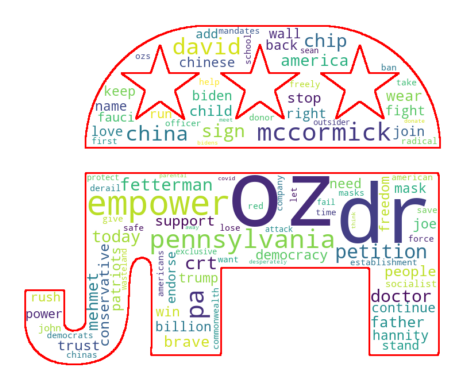

In [15]:
wordcloud(tf,'Dr. Mehmet Oz','R', True, path)

#### Test cloud for Democrats

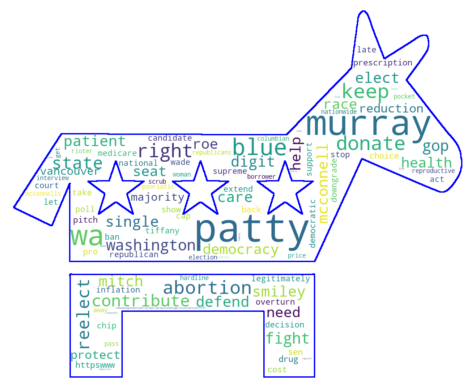

In [16]:
wordcloud(tf,'Patty Murray','D', True, path)

### Test all wordclouds

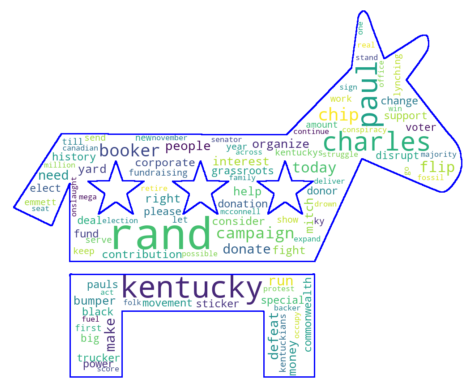

In [17]:
for c in dem_can:
    wordcloud(tf,c,'D', False, path)

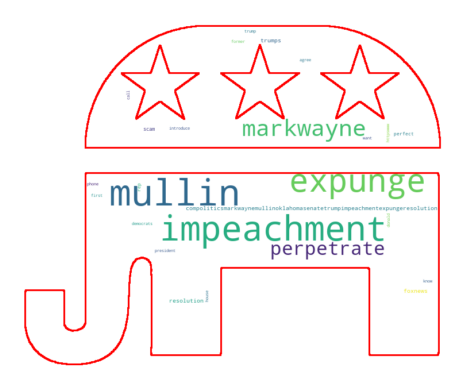

In [18]:
for c in rep_can:
    wordcloud(tf,c,'R', False, path)

## Sentiment Analysis
### Load dependencies and data

In [19]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import nltk
import textblob

np.set_printoptions(precision=2, linewidth=80)

In [20]:
df = pd.read_csv('fb_ads.csv')
df=df[df['normtext'].notna()]
df
corpus = np.array(df['normtext'])


## Sentiment Using VADER
### Function to implement the method

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment_vader_lexicon(corpus, 
                                    threshold=0.1,
                                    verbose=False):
    
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(corpus)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
                                   else 'negative'
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Predicted Sentiment', 'Polarity Score',
                                                                       'Positive', 'Negative', 'Neutral']], 
                                                              codes=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)
    
    return final_sentiment  

### Testing the function

In [22]:
test=df[0:10]
test['sentiment']=test['normtext'].apply(analyze_sentiment_vader_lexicon, verbose=True)

     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            positive           0.69    22.0%     0.0%   78.0%
     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            positive            0.9    33.0%     6.0%   61.0%
     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            negative          -0.05    18.0%    21.0%   61.0%
     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            positive           0.69    22.0%     0.0%   78.0%
     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            positive            0.9    33.0%     6.0%   61.0%
     SENTIMENT STATS:                                  

C:\Users\kookie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
test.head()

,party,page_name,text,normtext,ad_creation_time,sentiment
0,D,Patty Murray,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...,2022-10-06,positive
1,D,Patty Murray,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...,2022-10-06,positive
2,D,Patty Murray,Efforts to undermine our fair and free electio...,effort undermine fair free election put democr...,2022-10-06,negative
3,D,Patty Murray,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...,2022-10-04,positive
4,D,Patty Murray,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...,2022-10-04,positive


### Applying the function to the full corpus

In [24]:
df['sentiment']=df['normtext'].apply(analyze_sentiment_vader_lexicon)
df.head()

,party,page_name,text,normtext,ad_creation_time,sentiment
0,D,Patty Murray,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...,2022-10-06,positive
1,D,Patty Murray,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...,2022-10-06,positive
2,D,Patty Murray,Efforts to undermine our fair and free electio...,effort undermine fair free election put democr...,2022-10-06,negative
3,D,Patty Murray,https://www.usatoday.com/story/news/politics/2...,httpswww usatoday comstorynewspoliticstiffanys...,2022-10-04,positive
4,D,Patty Murray,I will ALWAYS defend a woman’s right to make h...,always defend woman right make health care dec...,2022-10-04,positive


### Save out results

In [25]:
df.to_csv('fbads_sentiments.csv')

### Plot results
#### Overall

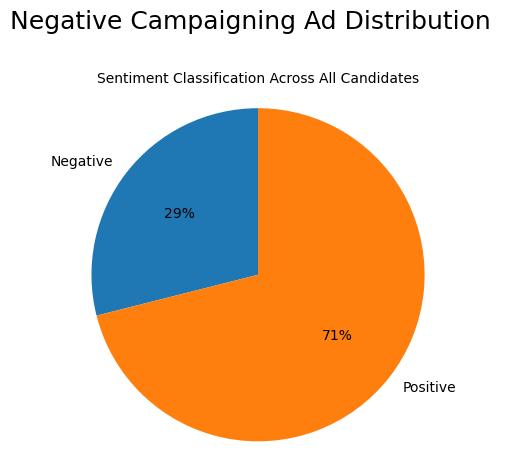

In [26]:
fig1, ax1 = plt.subplots()
ax1.pie(df['sentiment'].value_counts().sort_index(ascending=True), autopct='%1.0f%%',
        startangle=90, labels=['Negative', 'Positive'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Negative Campaigning Ad Distribution', y=1.05, fontsize=18)
plt.title('Sentiment Classification Across All Candidates', fontsize=10)
plt.ylabel('')
plt.show()

In [27]:
df['sentiment'].value_counts().sort_index(ascending=True)

negative    12444
positive    30551
Name: sentiment, dtype: int64

#### Candidate Plots

In [28]:
def sentiment_chart(df,party,can):
    #print(can)
    temp=df[df['page_name']==can]
    series=temp[['sentiment']]
    label=['Negative', 'Positive']
    
    if len(series['sentiment'].unique().tolist())==1:
        label=series['sentiment'].unique().tolist()
    fig1, ax1 = plt.subplots()
    ax1.pie(series.value_counts().sort_index(ascending=True), autopct='%1.0f%%',
            startangle=90, labels=label)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.suptitle('Ad Sentiment Classification', y=1.05, fontsize=18)
    plt.title(can, fontsize=10)
    plt.ylabel('')
    #plt.show()
    plt.savefig(path+'/sentiment/'+party+'/'+ can+'.png',dpi=100,format="png", transparent=True)


#### Democrats

C:\Users\kookie\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == "__main__":


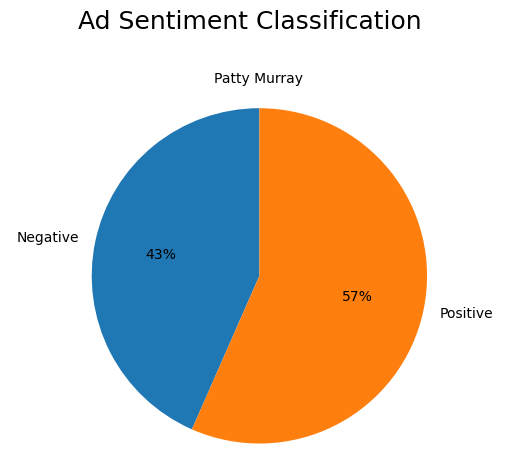

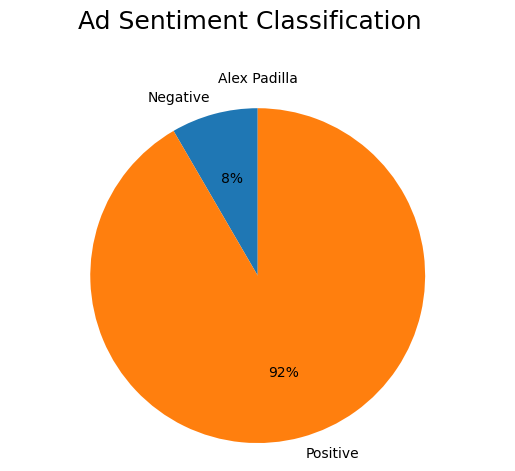

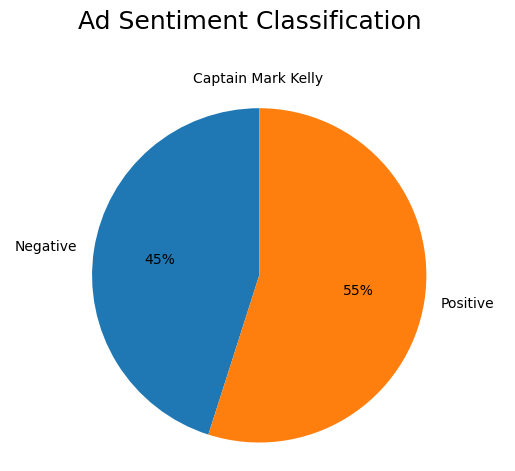

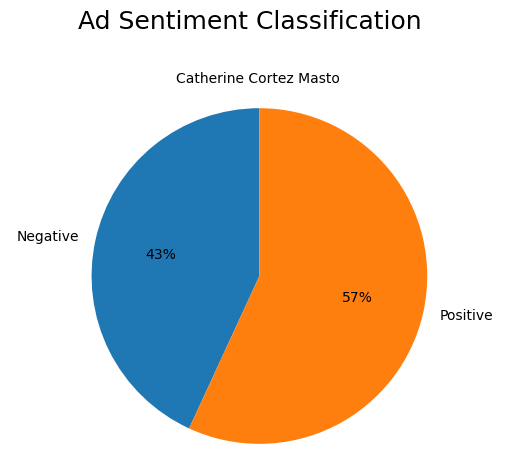

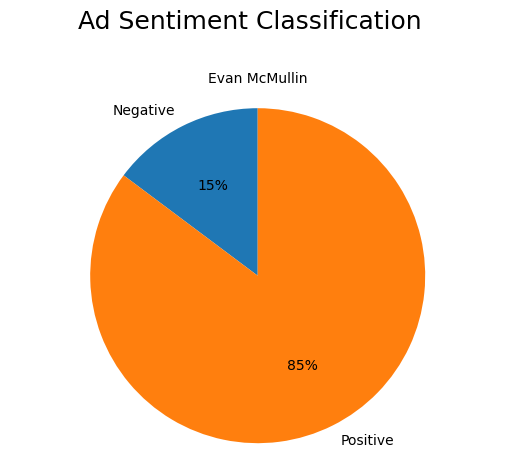

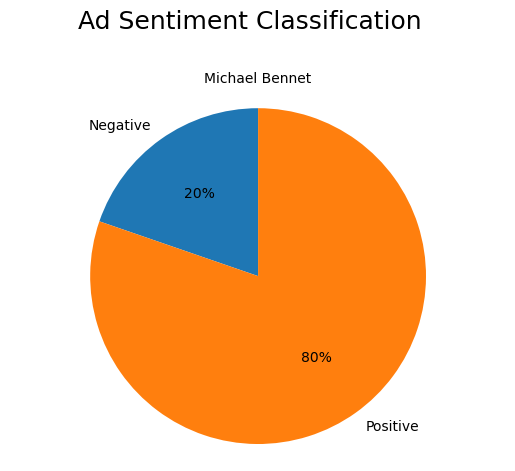

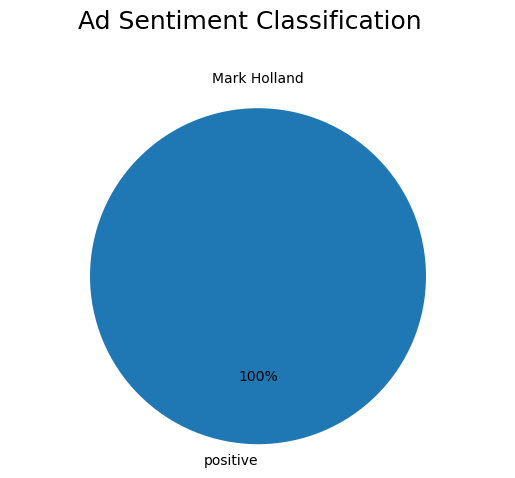

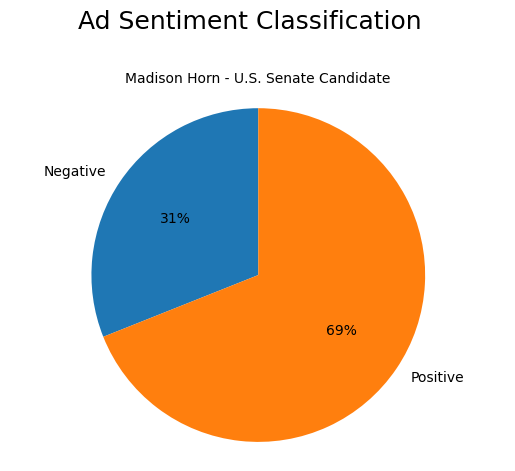

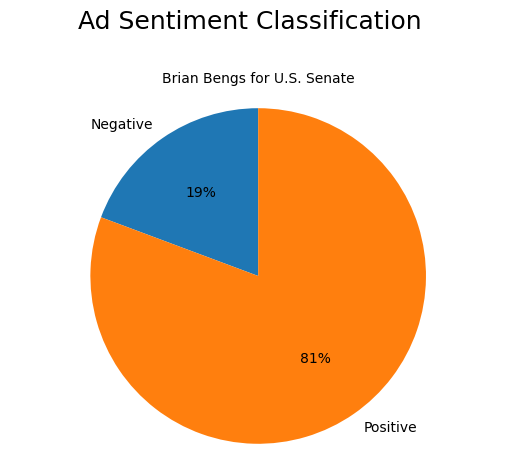

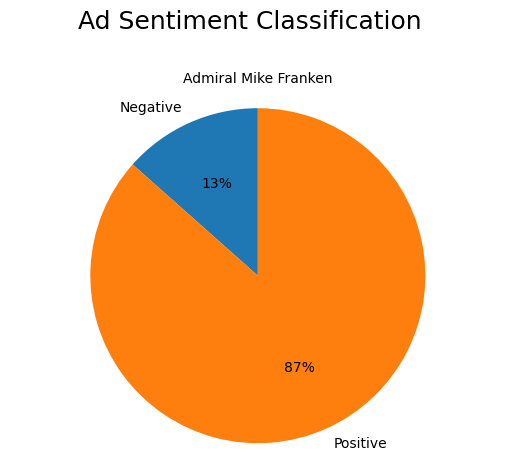

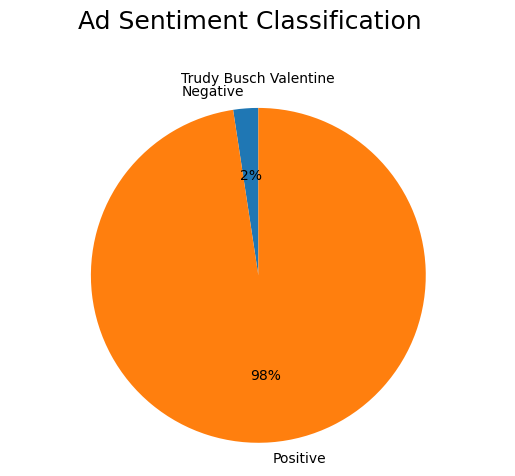

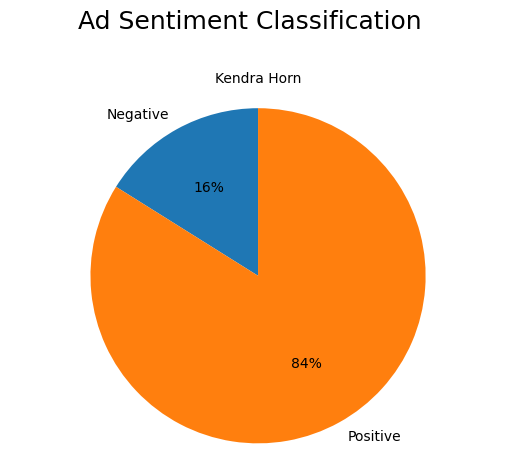

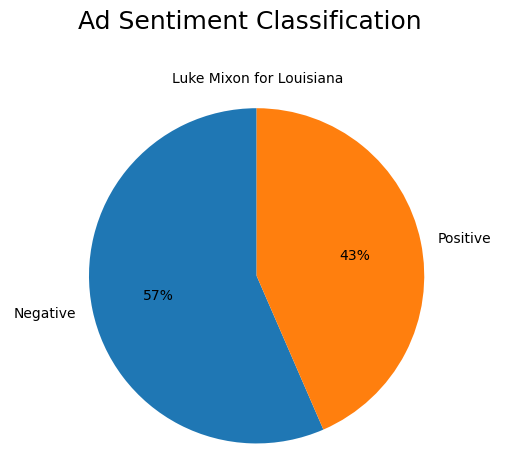

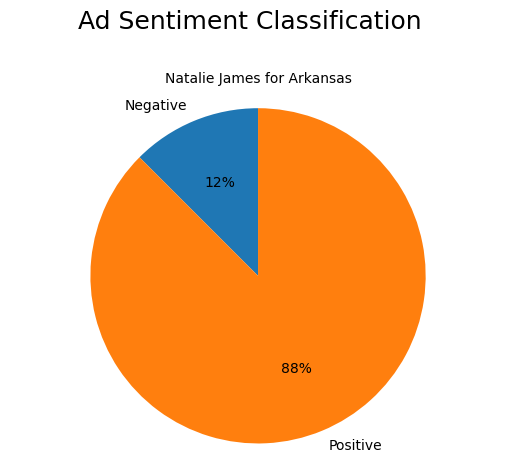

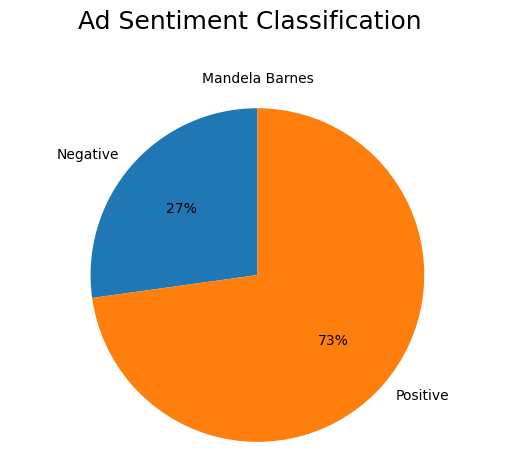

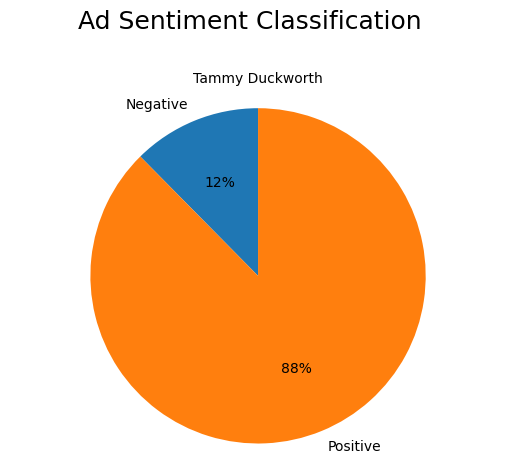

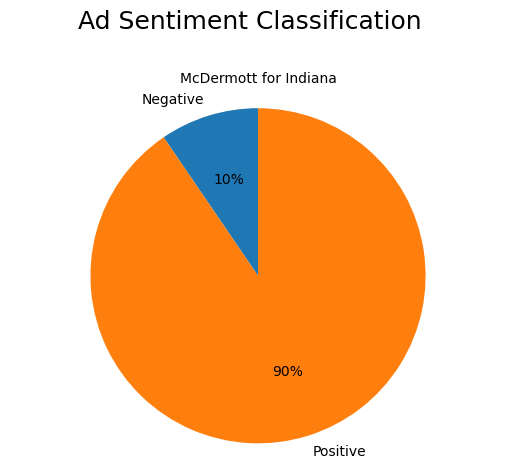

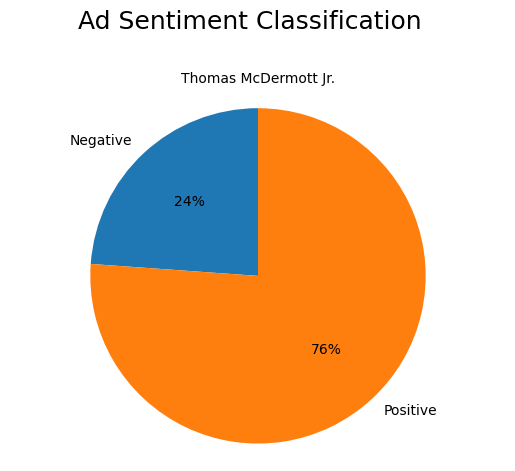

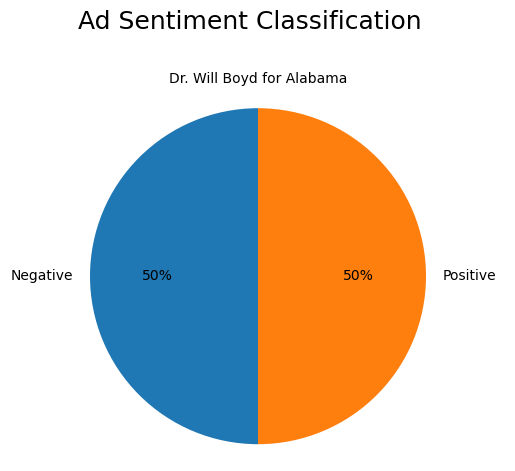

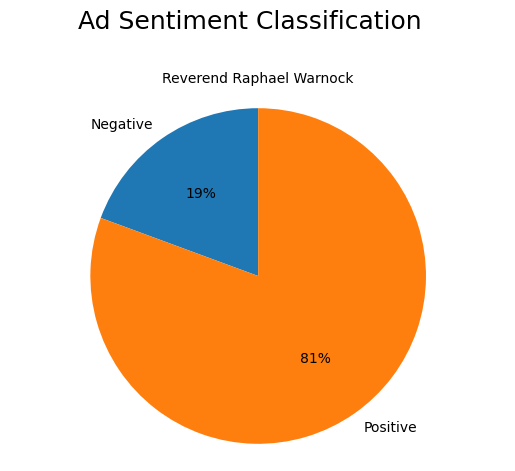

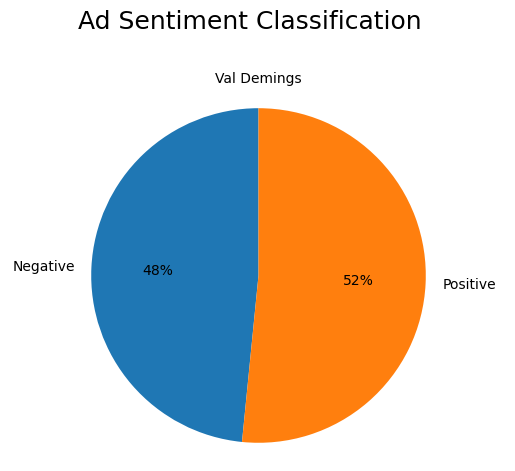

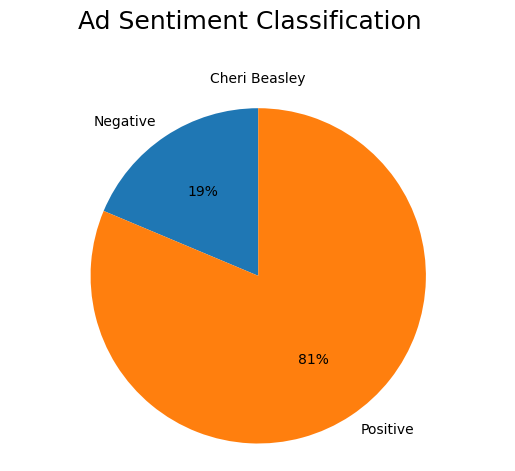

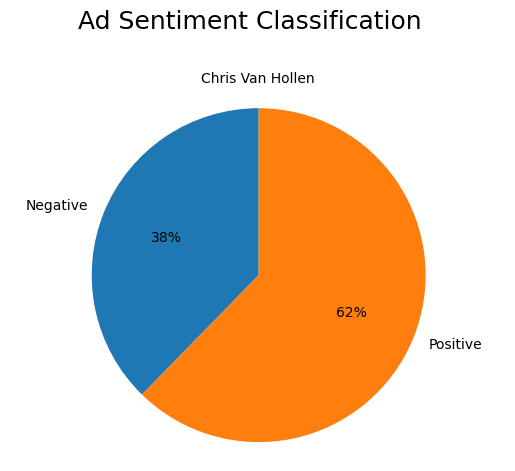

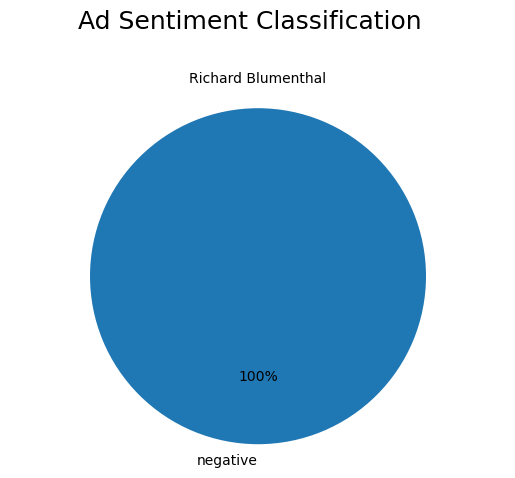

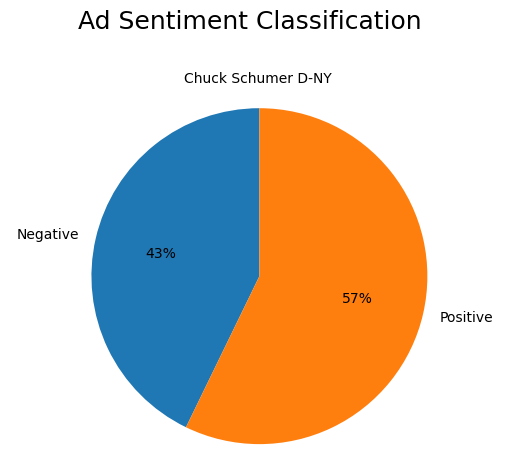

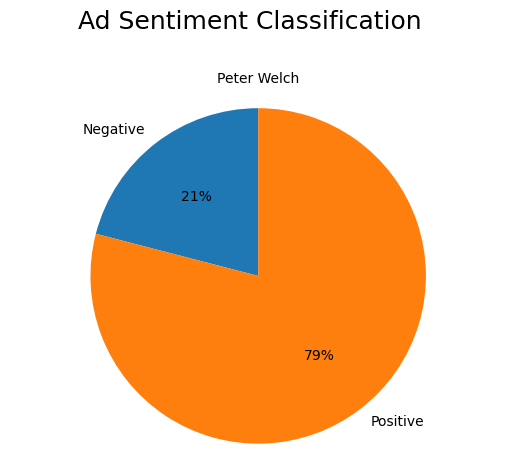

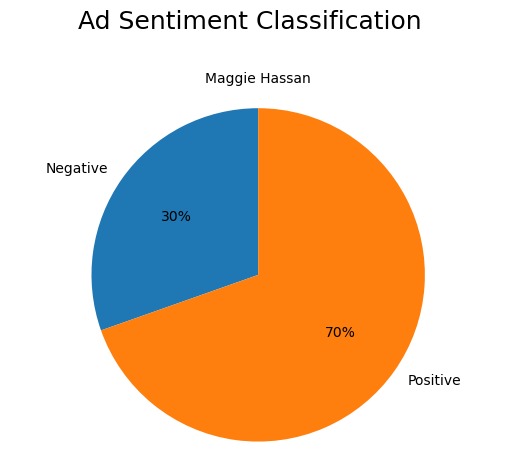

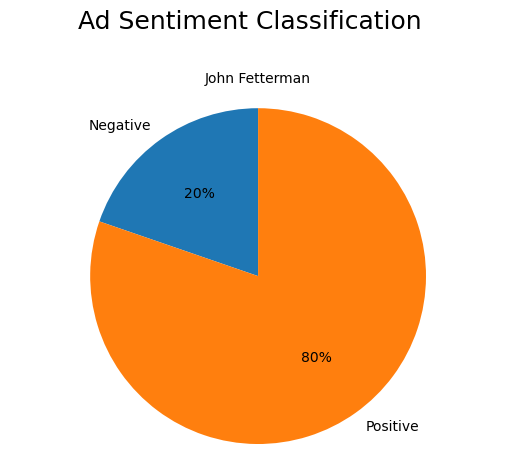

In [80]:
for c in dem_can:
    
    sentiment_chart(df,'D',c)

#### Republicans

C:\Users\kookie\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == "__main__":


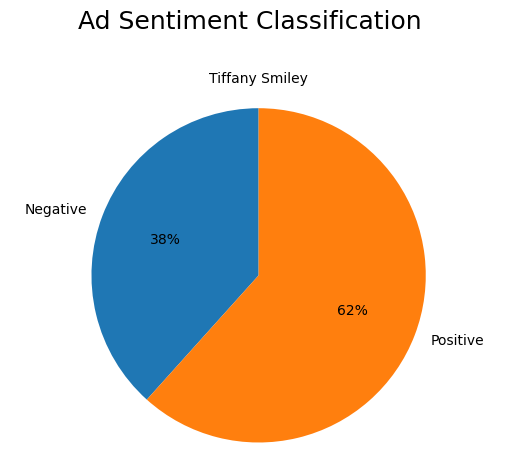

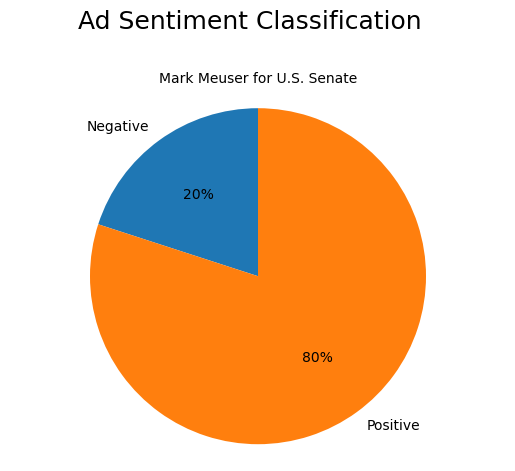

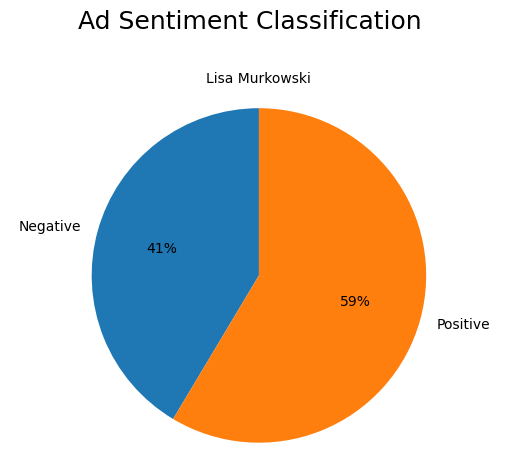

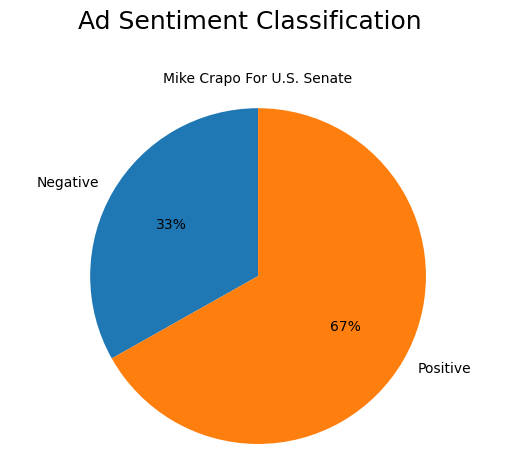

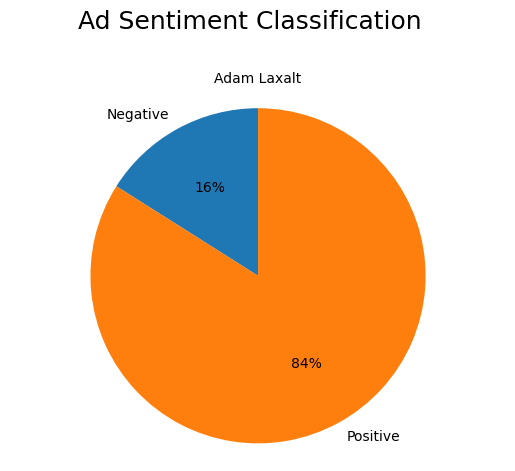

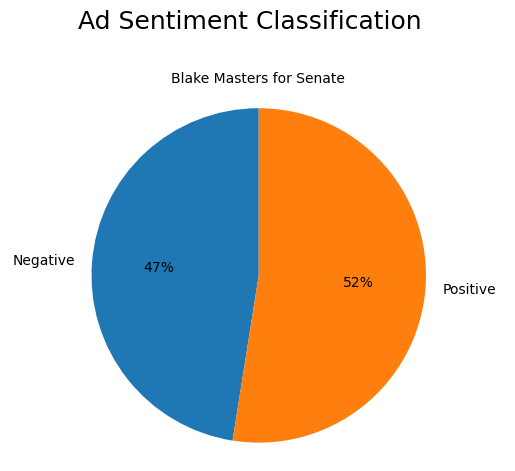

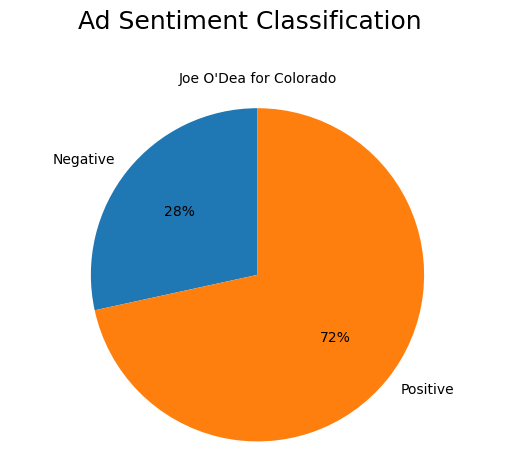

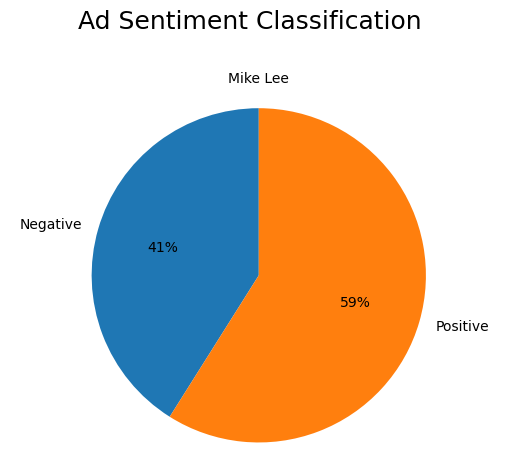

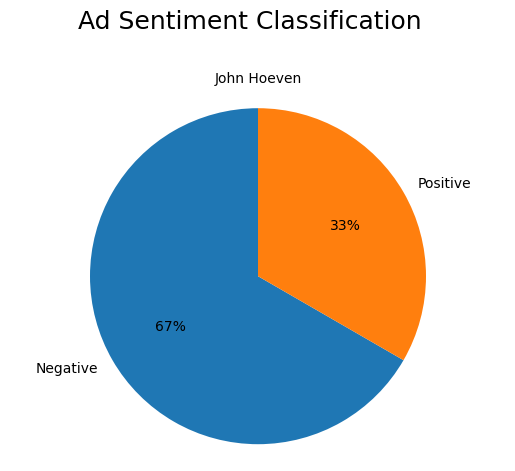

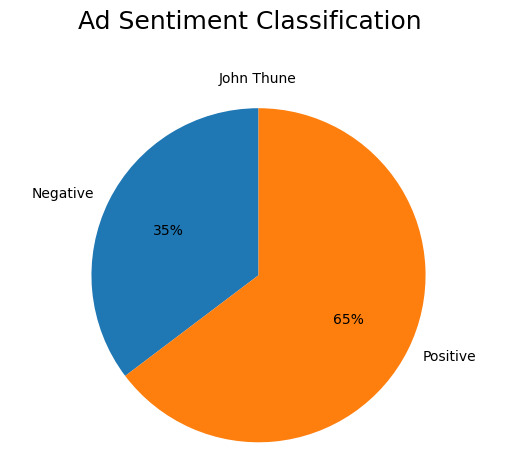

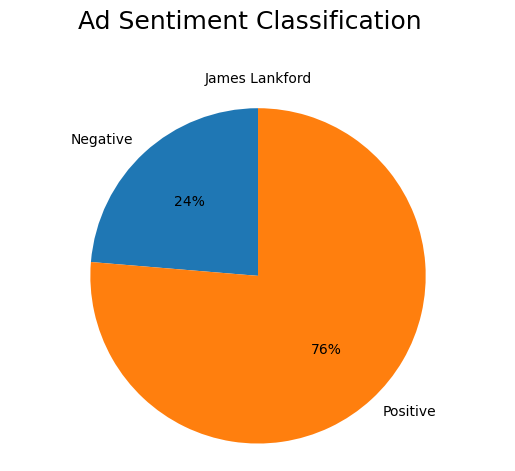

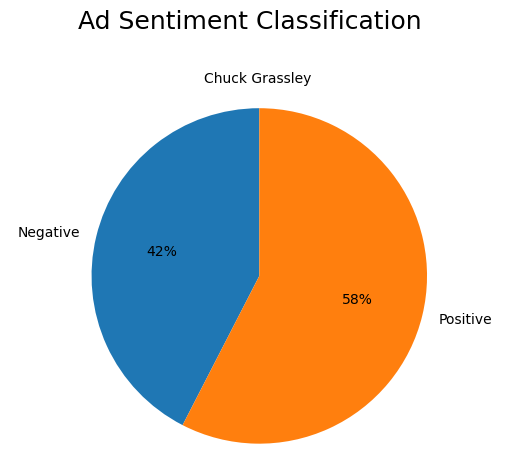

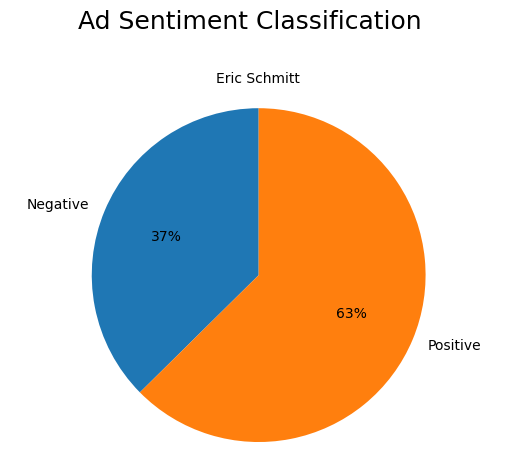

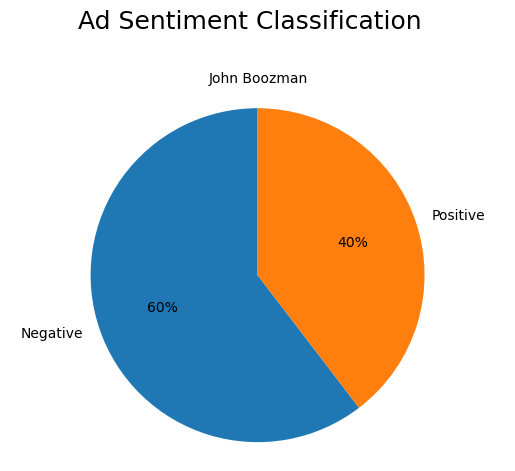

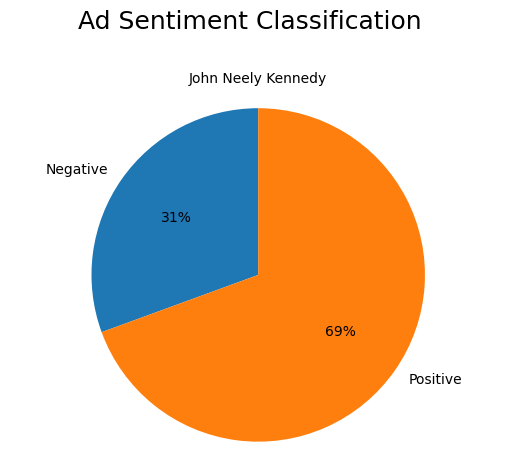

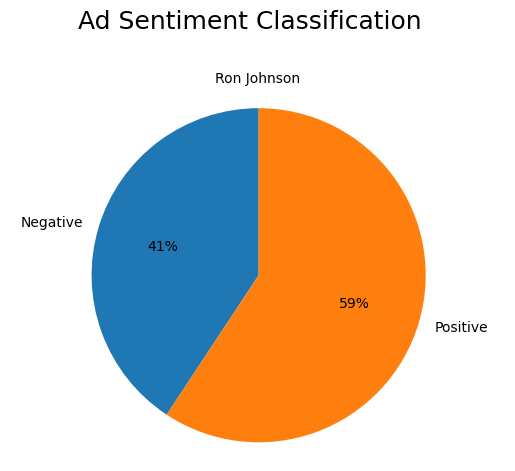

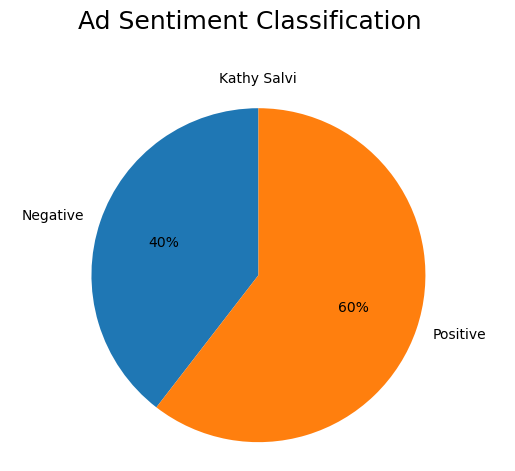

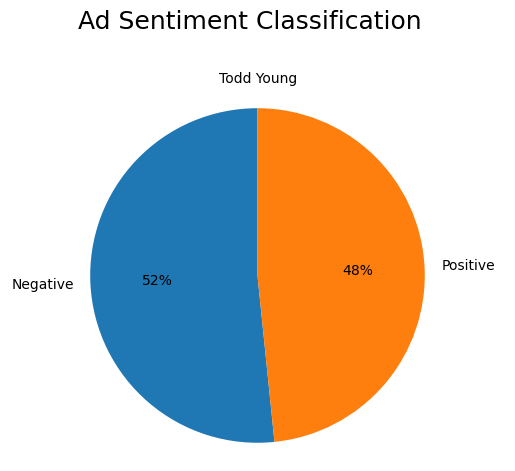

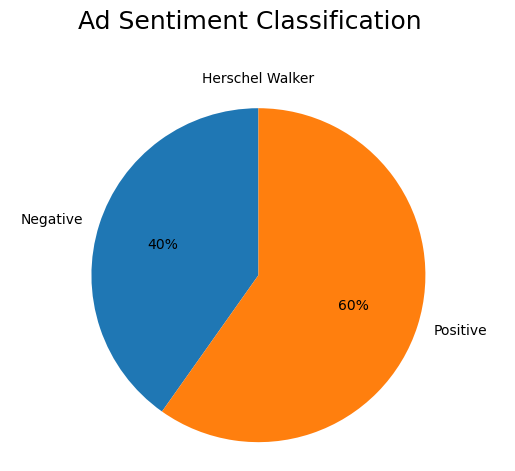

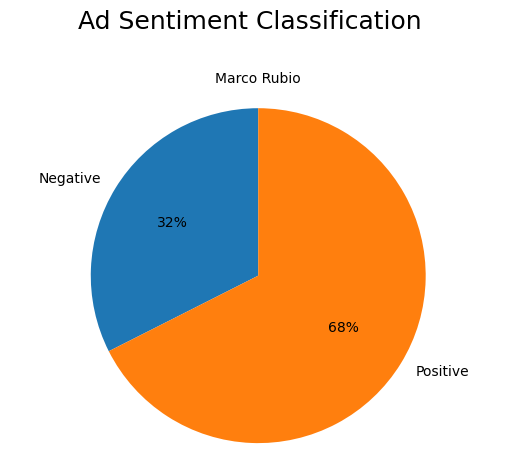

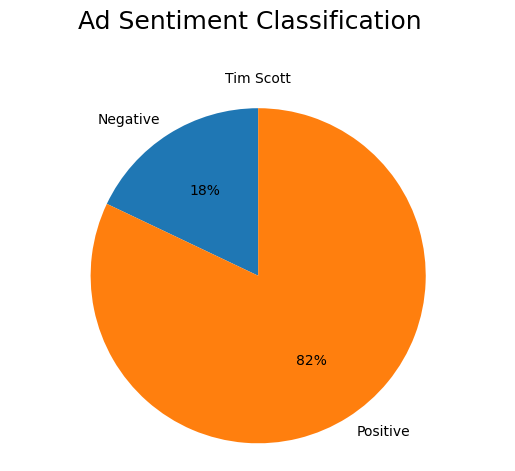

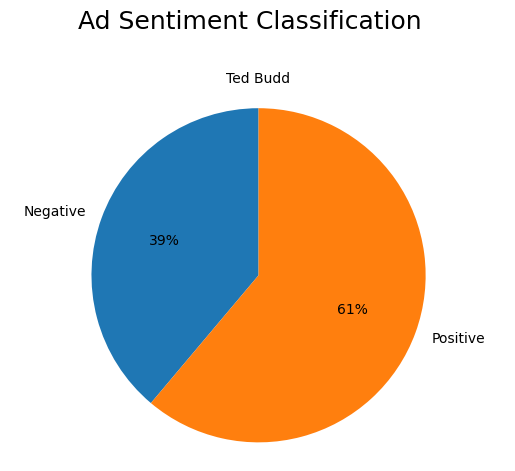

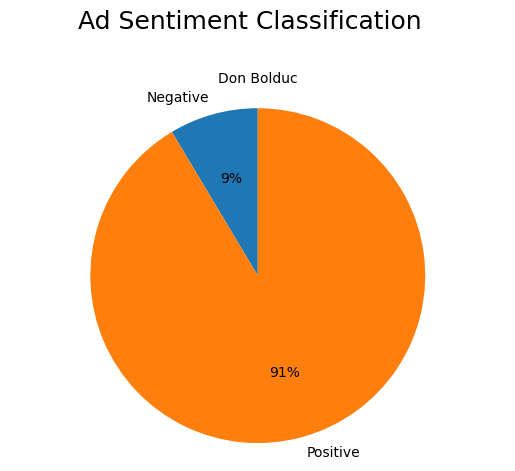

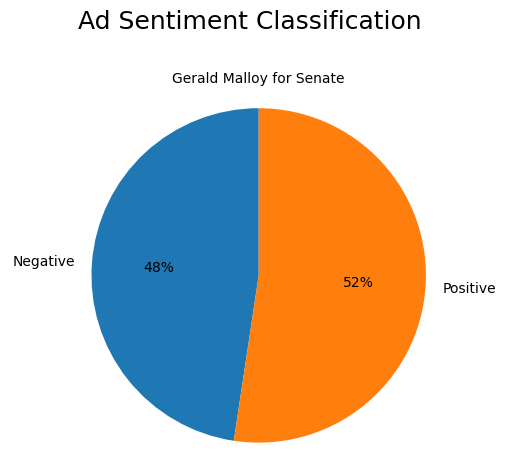

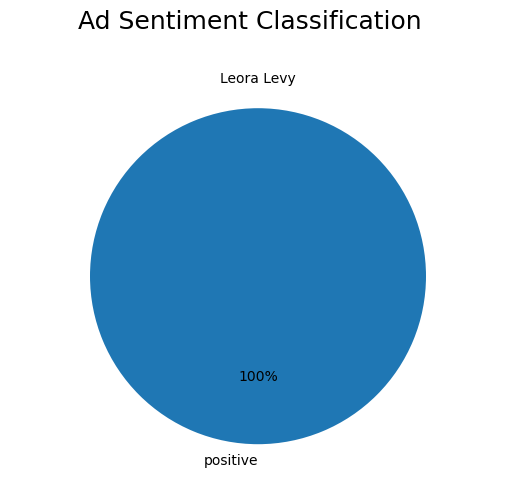

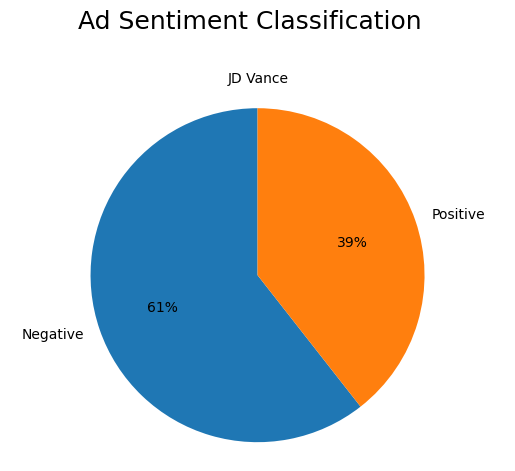

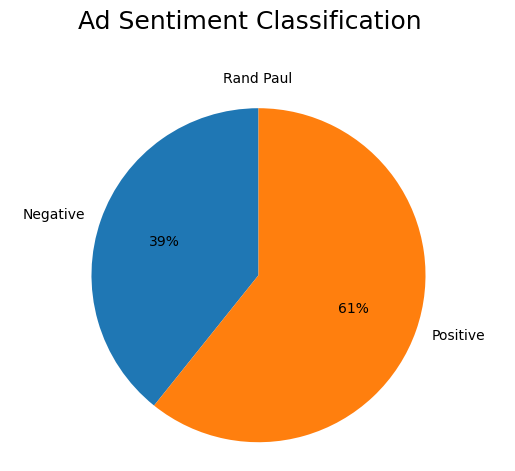

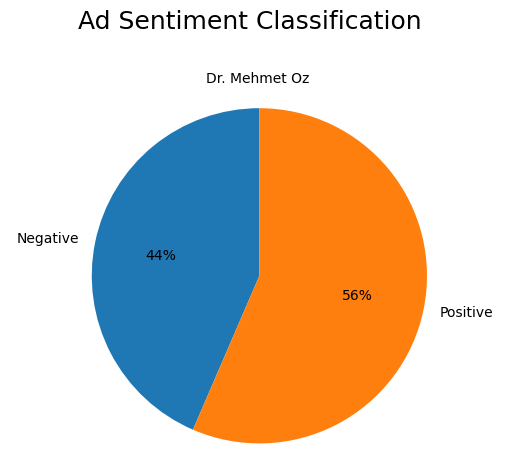

In [81]:
for c in rep_can:
    
    sentiment_chart(df,'R',c)

## Combining the methods
### Please enter the full state name (Indiana, not IN)

In [42]:
def results(state,party="D"):
    
    #dictionaries for candidates
    R={'New Hampshire':'Don Bolduc', 'Alabama':'No Ads', 'Maryland':'No Ads', 'Nevada':'Adam Laxalt', 'Iowa':'Chuck Grassley',
   'Arizona':'Blake Masters for Senate','Pennsylvania':'Dr. Mehmet Oz', 'Missouri':'Eric Schmitt', 'Vermont':'Gerald Malloy for Senate', 
   'Georgia':'Herschel Walker', 'Ohio':'JD Vance', 'Oklahoma':'James Lankford', 'Colorado':"Joe O'Dea for Colorado", 
   'Arkansas':'John Boozman', 'North Dakota':'John Hoeven', 'Louisiana':'John Neely Kennedy', 'South Dakota':'John Thune', 
   'Illinois':'Kathy Salvi', 'Connecticut':'Leora Levy', 'Oklahoma Special':'Markwayne Mullin', 'Kansas': 'No Ads', 
   'Alaska':'Lisa Murkowski', 'New York':'No Ads', 'Florida':'Marco Rubio', 'California':'Mark Meuser for U.S. Senate', 
   'Idaho':'Mike Crapo For U.S. Senate', 'Utah':'Mike Lee', 'Kentucky':'Rand Paul', 'Wisconsin':'Ron Johnson', 
   'North Carolina':'Ted Budd', 'Washington':'Tiffany Smiley', 'South Carolina':'Tim Scott', 'Indiana':'Todd Young'}

    D={"Iowa":'Admiral Mike Franken', 'California':'Alex Padilla', 'South Dakota':'Brian Bengs for U.S. Senate', 
       'Kentucky':'Charles Booker', 'Arizona':'Captain Mark Kelly', 'Nevada':'Catherine Cortez Masto', 'North Carolina':'Cheri Beasley', 
       'Maryland':'Chris Van Hollen', 'New York':'Chuck Schumer D-NY', 'Alabama':'Dr. Will Boyd for Alabama','Utah':'Evan McMullin', 
       'Pennsylvania':'John Fetterman', 'Oklahoma':'Kendra Horn', 'Louisiana':'Luke Mixon for Louisiana', 
       'Oklahoma Special':'Madison Horn - U.S. Senate Candidate', 'New Hampshire':'Maggie Hassan', 'Wisconsin':'Mandela Barnes', 
       'Kansas':'Mark Holland', 'South Carolina': 'No Ads', 'Colorado':'Michael Bennet', 
       'Arkansas':'Natalie James for Arkansas', 'Washington':'Patty Murray', 'Vermont':'Peter Welch', 
       'Georgia':'Reverend Raphael Warnock', 'Connecticut':'Richard Blumenthal', 'Illinois':'Tammy Duckworth', 
       'Indiana':'Thomas McDermott Jr.', 'Missouri':'Trudy Busch Valentine', 'Florida':'Val Demings'}
    
    if party=="R":
        candidate=R[state]
    else:
        candidate=D[state]
    
    print("State: "+state )
    print()
    if candidate != "No Ads":
        print("Candidate: "+ candidate)
        print()
        wordcloud(tf,candidate,party, False, path)
        sentiment_chart(df,party,candidate)
    else:
        print("Candidate Did Not Use Meta Ads")
        


State: New Hampshire

Candidate: Maggie Hassan



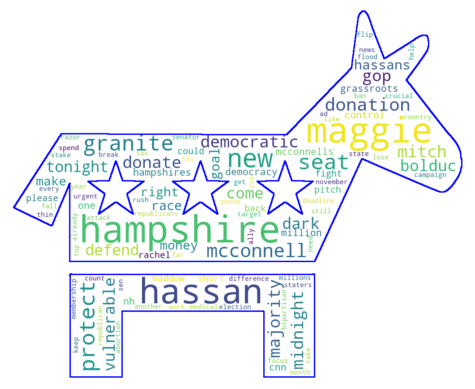

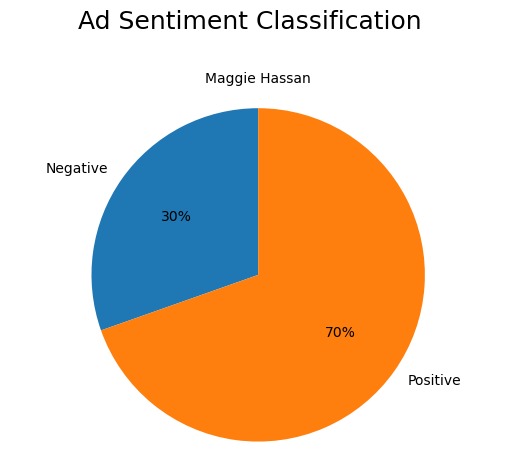

In [38]:
results("New Hampshire","D")

State: New Hampshire

Candidate: Don Bolduc



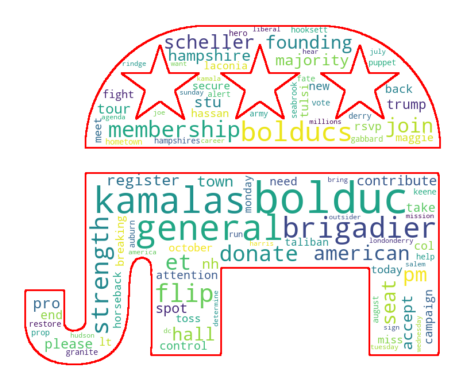

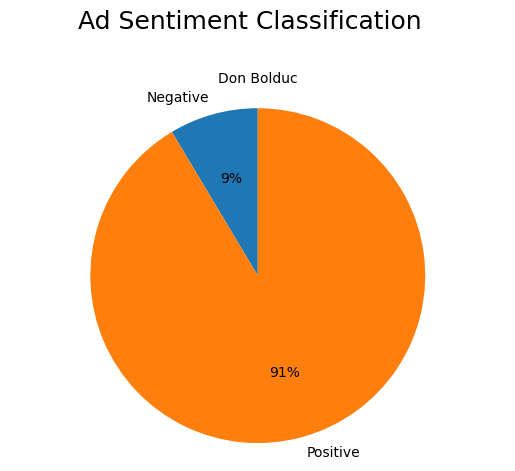

In [39]:
results("New Hampshire","R")

State: Indiana

Candidate: Thomas McDermott Jr.



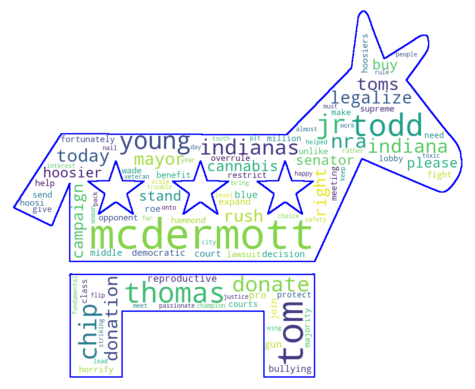

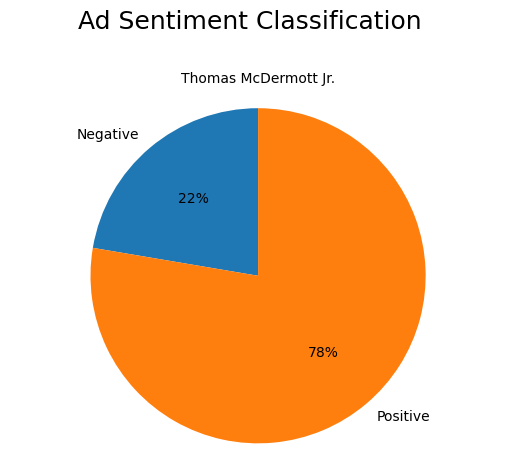

In [43]:
results("Indiana","D")

State: Indiana

Candidate: Todd Young



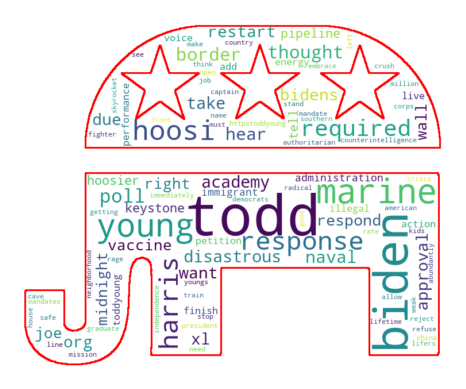

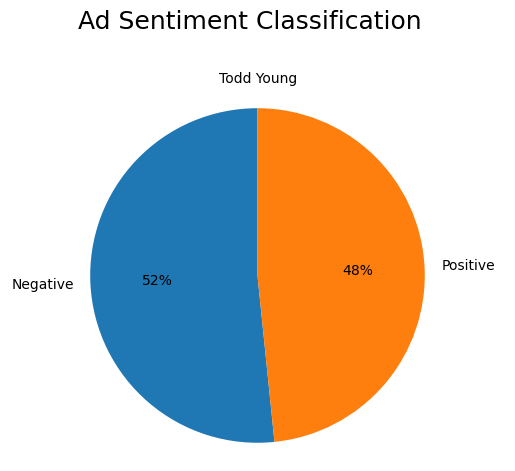

In [45]:
results("Indiana","R")

In [46]:
#case with no meta ad usage
results("South Carolina","D")

State: South Carolina

Candidate Did Not Use Meta Ads


## Personal Contribution Statement